目前使用LOP為定義之實驗數據採用29筆，加上Mean

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre
from scipy import stats

In [2]:
# TIP = pd.read_csv(os.path.join("/root/LR_ML", "0507.xlsx"))
# TIP = pd.read_excel('0507.xlsx', index_col=None)
# TIP = pd.read_csv(os.path.join('/root/LR_ML', 'Data_Sorted.csv'), error_bad_lines=False)
os.getcwd()

'/root/LR_ML'

In [3]:
datafile = u"/root/LR_ML/newData_mean3.xlsx"
TIP0 = pd.read_excel(datafile)

In [4]:
TIP = pd.DataFrame(TIP0)

In [5]:
TIP.head()

,SBPI,SBPL,SBPM,DBPI,DBPL,DBPM,BPMI,BPML,BPMM,LOP
0,133,140,136.5,85,88,86.5,83,94,88.5,140.0
1,135,128,131.5,89,92,90.5,92,90,91.0,140.0
2,113,110,111.5,64,68,66.0,70,75,72.5,120.0
3,116,118,117.0,73,71,72.0,72,77,74.5,120.0
4,114,123,118.5,71,73,72.0,83,78,80.5,120.0


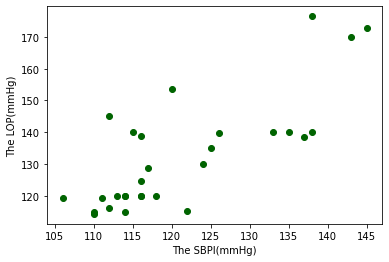

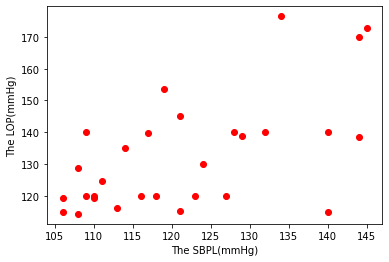

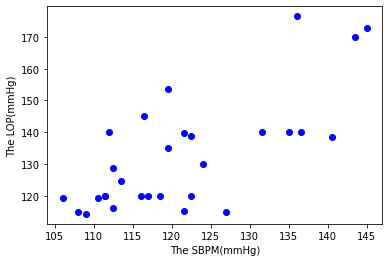

In [6]:
modTIP = TIP
#繪製散點圖,examDf.jt爲X軸，examDf.hk爲Y軸
plt.scatter(modTIP.SBPI,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
#添加圖的標籤（x軸，y軸）
plt.xlabel("The SBPI(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
plt.scatter(modTIP.SBPL,modTIP.LOP,color = 'red',label = "Exam Data")
plt.xlabel("The SBPL(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
plt.scatter(modTIP.SBPM,modTIP.LOP,color = 'blue',label = "Exam Data")
plt.xlabel("The SBPM(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

             SBPI        SBPL        SBPM       DBPI        DBPL       DBPM  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   121.241379  121.586207  121.413793  76.310345   74.827586  75.568966   
std     10.995633   12.511473   11.118733  10.941740   11.329699  10.244968   
min    106.000000  106.000000  106.000000  62.000000   60.000000  63.500000   
25%    114.000000  110.000000  112.500000  68.000000   68.000000  66.500000   
50%    116.000000  119.000000  119.500000  73.000000   71.000000  72.500000   
75%    126.000000  129.000000  127.000000  85.000000   79.000000  81.000000   
max    145.000000  145.000000  145.000000  99.000000  102.000000  98.500000   

             BPMI        BPML        BPMM         LOP  
count   29.000000   29.000000   29.000000   29.000000  
mean    84.275862   82.068966   83.172414  132.696552  
std     11.370063    9.877576   10.248934   17.737339  
min     65.000000   64.000000   64.500000  114.300000  
25%     

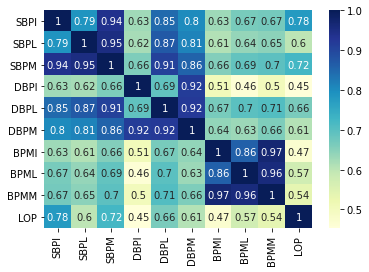

In [7]:
print(modTIP.describe())
rDf = modTIP.corr()#查看數據間的相關係數
print(rDf)
sns.heatmap(modTIP.corr(),annot=True, cmap="YlGnBu")

In [8]:
def t_test(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1)
    std2 = np.std(group2)
    nobs1 = len(group1)
    nobs2 = len(group2)
    
    modified_std1 = np.sqrt(np.float32(nobs1)/
                    np.float32(nobs1-1)) * std1
    modified_std2 = np.sqrt(np.float32(nobs2)/
                    np.float32(nobs2-1)) * std2
    (statistic, pvalue) = stats.ttest_ind_from_stats( 
               mean1=mean1, std1=modified_std1, nobs1=nobs1,   
               mean2=mean2, std2=modified_std2, nobs2=nobs2 )
    return statistic, pvalue

In [9]:
print(t_test(modTIP.SBPI, modTIP.SBPL))
print(t_test(modTIP.SBPI, modTIP.SBPM))
print(t_test(modTIP.SBPL, modTIP.SBPM))
print(t_test(modTIP.DBPI, modTIP.DBPL))
print(t_test(modTIP.DBPI, modTIP.DBPM))
print(t_test(modTIP.DBPL, modTIP.DBPM))
print(t_test(modTIP.BPMI, modTIP.BPML))
print(t_test(modTIP.BPMI, modTIP.BPMM))
print(t_test(modTIP.BPML, modTIP.BPMM))
print(t_test(modTIP.SBPI, modTIP.LOP))
print(t_test(modTIP.SBPL, modTIP.LOP))
print(t_test(modTIP.SBPM, modTIP.LOP))
print(t_test(modTIP.DBPI, modTIP.LOP))
print(t_test(modTIP.DBPL, modTIP.LOP))
print(t_test(modTIP.DBPM, modTIP.LOP))
print(t_test(modTIP.BPMI, modTIP.LOP))
print(t_test(modTIP.BPML, modTIP.LOP))
print(t_test(modTIP.BPMM, modTIP.LOP))
print(t_test(modTIP.LOP, modTIP.LOP))

(-0.11148483433198965, 0.9116305241367944)
(-0.05937516124148003, 0.9528646773261553)
(0.05547093700941722, 0.955960720693009)
(0.5069560691463824, 0.6141761561474033)
(0.2663521932176049, 0.7909462653682996)
(-0.261373871788581, 0.794763113235043)
(0.7890718642843764, 0.43339811822247853)
(0.3881926268771072, 0.6993453271849503)
(-0.41746841874922885, 0.6779320782431989)
(-2.9559564112422763, 0.004554785499000789)
(-2.756429536616856, 0.00787290089844911)
(-2.902408872302884, 0.005286930866286799)
(-14.569999973906368, 1.0552664164970757e-20)
(-14.806588277581662, 5.140095356469092e-21)
(-15.019011759389914, 2.710408653281919e-21)
(-12.376321021556741, 1.164019261851203e-17)
(-13.428977393047388, 3.7384273851348906e-19)
(-13.018781711842228, 1.4035580359016846e-18)
(0.0, 1.0)


自變量---源數據: (29,) ；  訓練集: (23,) ；  測試集: (6,)
因變量---源數據: (29,) ；  訓練集: (23,) ；  測試集: (6,)


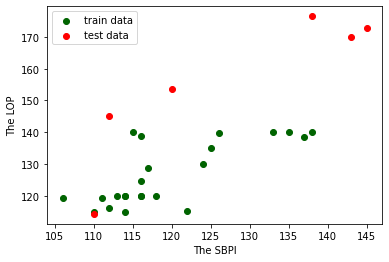

In [10]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.SBPI,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPI.shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#散點圖
plt.scatter(X_train, Y_train, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test, Y_test, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (29,) ；  訓練集: (23,) ；  測試集: (6,)
因變量---源數據: (29,) ；  訓練集: (23,) ；  測試集: (6,)


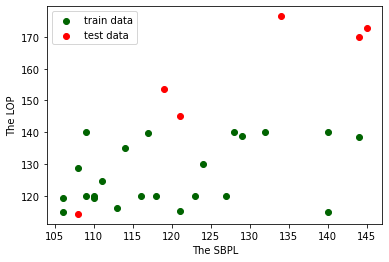

In [11]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(modTIP.SBPL,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPL.shape, "；  訓練集:",X_train2.shape, "；  測試集:",X_test2.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train2.shape, "；  測試集:",Y_test2.shape)
#散點圖
plt.scatter(X_train2, Y_train2, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test2, Y_test2, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPL")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (29,) ；  訓練集: (23,) ；  測試集: (6,)
因變量---源數據: (29,) ；  訓練集: (23,) ；  測試集: (6,)


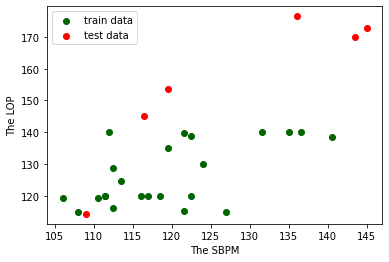

In [12]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(modTIP.SBPM,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPM.shape, "；  訓練集:",X_train3.shape, "；  測試集:",X_test3.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train3.shape, "；  測試集:",Y_test3.shape)
#散點圖
plt.scatter(X_train3, Y_train3, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test3, Y_test3, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPM")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

In [13]:
# plt.scatter(modTIP.SBP1, modTIP.TIP, color="darkgreen", label="分布")

In [14]:
# X_1 = np.array([1 for i in range(28)])
# x_train = np.array(X_train)
# x = np.zeros((28,2))
# x[:,0] = X_1
# x[:,1] = x_train
# #線性迴歸訓練
# model = LinearRegression()
# model.fit(x,Y_train)#調用線性迴歸包
# a  = model.intercept_#截距
# b = model.coef_#迴歸係數
# #訓練數據的預測值
# y_train_pred = model.predict(x)
# #繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
# plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
# #測試數據散點圖
# plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
# plt.scatter(X_test, Y_test, color='red', label="test data")
# #添加圖標標籤
# plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
# plt.xlabel("The SBP")#添加 X 軸名稱
# plt.ylabel("The TIP")#添加 Y 軸名稱
# plt.show()#顯示圖像
# print("擬合參數:截距",a,",迴歸係數：",b)
# print("最佳擬合線: Y = ",round(a,2),"+",round(b[1],2),"* X")
# #顯示線性方程，並限制參數的小數位爲兩位

In [15]:
q = np.array(X_train)#q原先shape是(28,0)
np.shape(q)
q = np.reshape(q, (23,1))#reshape換成(28,1)

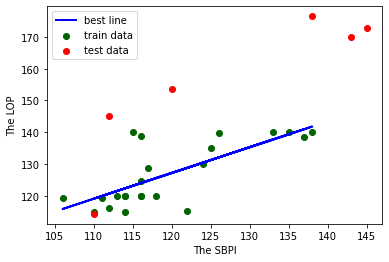

擬合參數:截距 29.837042459736494 ,迴歸係數： [0.8113348]
最佳擬合線: Y =  29.84 + 0.81 * X


In [16]:
model = LinearRegression()
model.fit(q,Y_train)#調用線性迴歸包
# model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#迴歸係數
#訓練數據的預測值
y_train_pred = model.predict(q)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a,",迴歸係數：",b)
print("最佳擬合線: Y = ",round(a,2),"+",round(b[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位

In [17]:
q2 = np.array(X_train2)#q原先shape是(28,0)
np.shape(q2)
q2 = np.reshape(q2, (23,1))#reshape換成(28,1)

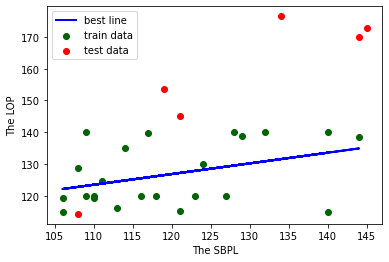

擬合參數:截距 86.49541463851645 ,迴歸係數： [0.33626333]
最佳擬合線: Y =  86.5 + 0.34 * X


In [18]:
model2 = LinearRegression()
model2.fit(q2,Y_train2)#調用線性迴歸包
# model.fit(X_train,Y_train)
a2  = model2.intercept_#截距
b2 = model2.coef_#迴歸係數
#訓練數據的預測值
y_train_pred2 = model2.predict(q2)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train2, y_train_pred2, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train2, Y_train2, color='darkgreen', label="train data")
plt.scatter(X_test2, Y_test2, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPL")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a2,",迴歸係數：",b2)
print("最佳擬合線: Y = ",round(a2,2),"+",round(b2[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位

In [19]:
q3 = np.array(X_train3)#q原先shape是(28,0)
np.shape(q3)
q3 = np.reshape(q3, (23,1))#reshape換成(28,1)

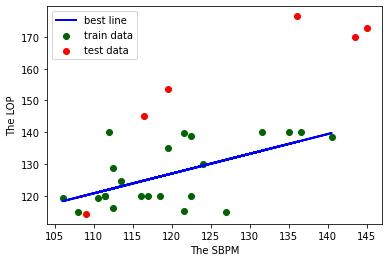

擬合參數:截距 52.380862380410804 ,迴歸係數： [0.62185723]
最佳擬合線: Y =  52.38 + 0.62 * X


In [20]:
model3 = LinearRegression()
model3.fit(q3,Y_train3)#調用線性迴歸包
# model.fit(X_train,Y_train)
a3  = model3.intercept_#截距
b3 = model3.coef_#迴歸係數
#訓練數據的預測值
y_train_pred3 = model3.predict(q3)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train3, y_train_pred3, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train3, Y_train3, color='darkgreen', label="train data")
plt.scatter(X_test3, Y_test3, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPM")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a3,",迴歸係數：",b3)
print("最佳擬合線: Y = ",round(a3,2),"+",round(b3[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位